In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = datasets.load_iris()

In [4]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

X = iris_scaled
y = [[1] if target == 0 else [0] for target in iris.target]

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 49)

## KMeans

In [6]:
class KMeansCluster(object):
    
    def __init__(self, k, n_iterations):
        self.k = k
        self.n_iterations = n_iterations
        self.buckets = []
        
    def init_means(self, n_attributes):
        self.n_attributes = n_attributes
        self.bucket_means = [[num/100 for num in random.sample(range(1, 100), n_attributes)] for i in range(self.k)]
        
    def distance(self, p1, p2):
        return euclidean_distances(p1, p2)[0][0]
    
    def assign_bucket(self, row, index, original_bucket):
        distances = [self.distance(row, self.bucket_means[i]) for i in range(self.k)]
        distances = np.array(distances)
        closest_bucket = distances.argmin()
        self.buckets[index] = closest_bucket
        if closest_bucket != original_bucket:
            self.change += 1
            
    def calc_means(self):
        for k in range(self.k):
            Sum = np.zeros(self.n_attributes)
            rows = 0
            for i in range(self.n_rows):
                if(self.buckets[i] == k):
                    Sum += self.dataset[i]
                    rows += 1
            Sum = Sum/rows
            self.bucket_means[k] = Sum
    
    def cluster(self, dataset):
        self.change = 0
        self.dataset = dataset
        self.n_rows = dataset.shape[0]
        iters = 0
        self.buckets = [(self.k + 1) for i in range(dataset.shape[0])]
        self.init_means(dataset.shape[1])
        
        while(iters < self.n_iterations):
            for i in range(self.n_rows):
                self.assign_bucket(dataset[i], i, self.buckets[i])
            self.calc_means()
                
            if self.change == 0:
                print("No Change")
                break
            else:
                print("Iteration : ", iters, " : ", self.buckets)
                self.change = 0
                iters += 1
        print(self.buckets)
        return self.buckets

In [7]:
cluster = KMeansCluster(k=3, n_iterations=100)

In [8]:
buckets = cluster.cluster(iris_scaled[:,:2])

Iteration :  0  :  [2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1]
Iteration :  1  :  [2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1]
Iteration :  2  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [9]:
train_X.shape

(112, 4)

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
marker_map = ['o', 'x', '+']

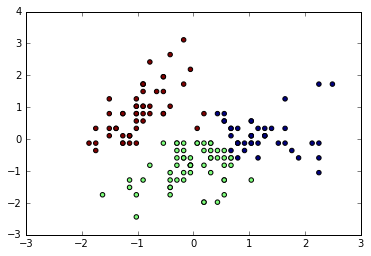

In [12]:
plt.scatter(iris_scaled[:,:1], iris_scaled[:,1:2], c=buckets)